In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Load dataset from Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

In [2]:
#Load libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import glob

In [3]:
#Load file csv
FilePath = "../input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv"
dataSet = pd.read_csv(FilePath)

In [4]:
#Get label from csv file
Label = dataSet["label"]
Data = dataSet.drop(columns=["label"]) 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

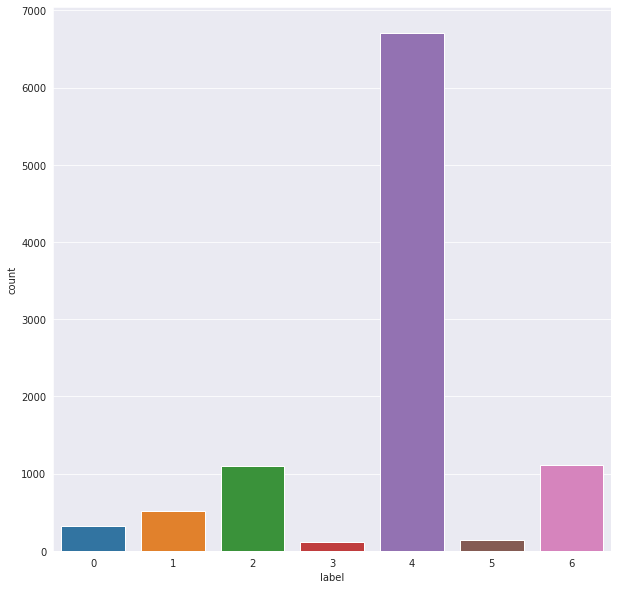

In [5]:
#Count label
import seaborn as sns

plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(Label)

Nhận xét: Chúng ta có thể thấy dữ liệu input không được cân bằng, vì thế chúng ta cần làm chúng cân bằng để giúp tập dữ liệu training đạt được hiệu quả cao

In [6]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()
Data,Label  = oversample.fit_resample(Data,Label)
Data = np.array(Data).reshape(-1,28,28,3)
print('Shape of Data :',Data.shape)

Shape of Data : (46935, 28, 28, 3)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

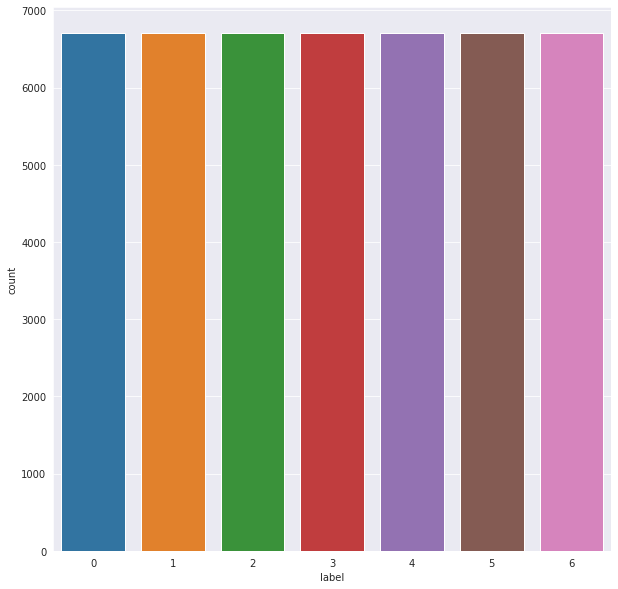

In [7]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(Label)

Sau khi xử lý thì dữ liệu chúng ta đã được cân bằng

In [8]:
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6])

In [9]:
classes = { 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
            1:('bcc' , ' basal cell carcinoma'),
            2 :('bkl', 'benign keratosis-like lesions'),
            3: ('df', 'dermatofibroma'),
            4: ('nv', ' melanocytic nevi'),
            5: ('vasc', 'vascular lesions'),
            6: ('mel', 'melanoma')}

Gắn nhãn cho các bệnh được dự đoán. ('ký hiệu', 'tên đầy đủ')

In [10]:
#Split data into train and test data
X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(11734, 28, 28, 3)
(35201,)
(11734,)


Sau khi tách dữ liệu từ dataset, ta có được tập train gồm 35201 tấm ảnh và tập test là 11734 tấm ảnh.
Tiếp theo, chúng ta sẽ hiển thị ra 10 tấm ảnh để xem thử chúng như thế nào.

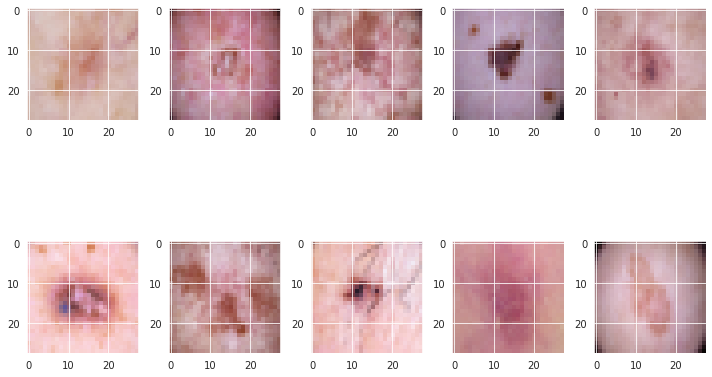

In [12]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [13]:
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

Vì dữ liệu đầu ra là 7 loại bệnh liên quan đến da nên chúng ta cần mã hóa đầu ra thành chuỗi nhị phân 7 bit bằng hàm to_categorical

In [14]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [15]:
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

datagenerator = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)

testgenerator = ImageDataGenerator(rescale=(1./255))

Sử dụng phương pháp làm giàu dữ liệu để tránh bị overfitting trong quá trình train mô hình. Ở đây, chúng ta dùng hàm ImageDataGenerator

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.0001)

Chúng ta nên khởi tạo thêm 1 hàm tỷ lệ học giảm sút (Learning Rate Decay) để giúp quá trình đào tạo được thuận lợi hơn

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (28,28,3)))
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(256,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation= 'relu',kernel_initializer='he_uniform'))
model.add(Dense(7,activation = 'softmax', kernel_initializer="glorot_uniform" , name = 'classifier'))

2022-06-09 15:01:38.667969: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 15:01:38.781973: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 15:01:38.782720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 15:01:38.783802: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Bắt đầu xây dựng mô hình bằng kỹ thuật CNN với các lớp Convolution, Pooling và Padding

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

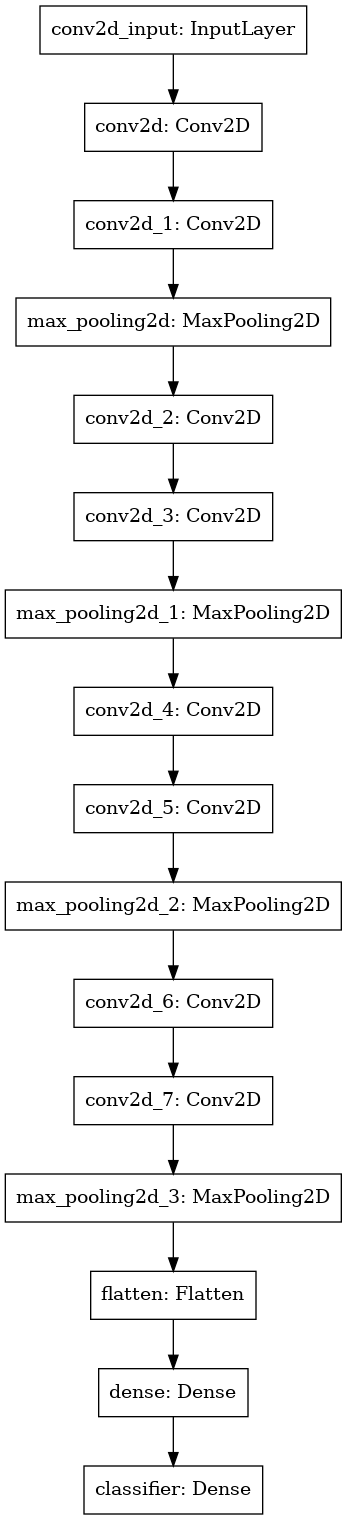

In [19]:
from tensorflow import keras

keras.utils.plot_model(model)

Vẽ biểu đồ mô hình để xem các lớp được kết nối với nhau như thế nào

In [20]:
#Compile model with optimier 'adam'
model.compile(optimizer= 'adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])

In [21]:
#Start training model with 25 epochs
history = model.fit(X_train ,
                    y_train ,
                    epochs=25 ,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

2022-06-09 15:01:43.746961: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-06-09 15:01:45.238500: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


276/276 [==============================] - 11s 13ms/step - loss: 9.0976 - accuracy: 0.5731 - val_loss: 0.6823 - val_accuracy: 0.7620
Epoch 2/25
276/276 [==============================] - 3s 11ms/step - loss: 0.4835 - accuracy: 0.8249 - val_loss: 6.5355 - val_accuracy: 0.1771
Epoch 3/25
276/276 [==============================] - 3s 11ms/step - loss: 1.0268 - accuracy: 0.6321 - val_loss: 1.6952 - val_accuracy: 0.4906

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/25
276/276 [==============================] - 3s 11ms/step - loss: 0.4155 - accuracy: 0.8536 - val_loss: 0.3134 - val_accuracy: 0.8883
Epoch 5/25
276/276 [==============================] - 3s 12ms/step - loss: 0.2073 - accuracy: 0.9343 - val_loss: 0.1930 - val_accuracy: 0.9345
Epoch 6/25
276/276 [==============================] - 3s 11ms/step - loss: 0.1263 - accuracy: 0.9600 - val_loss: 0.1651 - val_accuracy: 0.9445
Epoch 7/25
276/276 [==============================] - 3s 11ms/step - lo

In [22]:
#Evaluate model
model.evaluate(X_test, y_test)

367/367 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9836


[0.0767596960067749, 0.983637273311615]

In [23]:
#Save model to h5 file
model.save('final_cnn.h5')

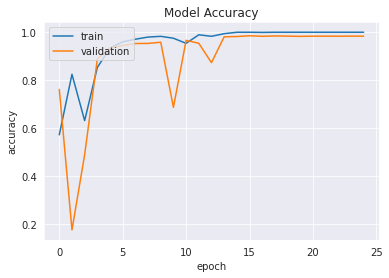

In [24]:
#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

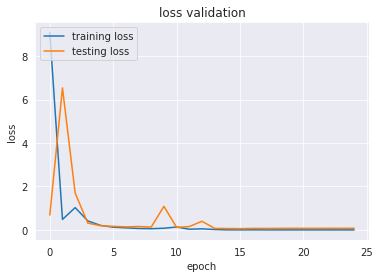

In [25]:
#Plot loss validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss','testing loss'], loc = 'upper left')

In [26]:
y_pred  = model.predict(X_test).round()

In [27]:
from sklearn.metrics import confusion_matrix , classification_report

target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(y_test , y_pred , target_names =target_names ))

                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       1.00      1.00      1.00      1667
                             ('bcc', ' basal cell carcinoma')       0.99      1.00      0.99      1689
                     ('bkl', 'benign keratosis-like lesions')       0.97      0.99      0.98      1651
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1629
                                  ('nv', ' melanocytic nevi')       0.98      0.90      0.94      1663
                                 ('vasc', 'vascular lesions')       1.00      1.00      1.00      1680
                                          ('mel', 'melanoma')       0.95      0.99      0.97      1755

                                                    micro avg       0.98      0.98      0.98     11734
                                                    macro avg       0.9

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vẽ ma trận lỗi (confusion matrix) để đánh giá độ chính xác của mô hình với từng lớp được phân loại

<AxesSubplot:>

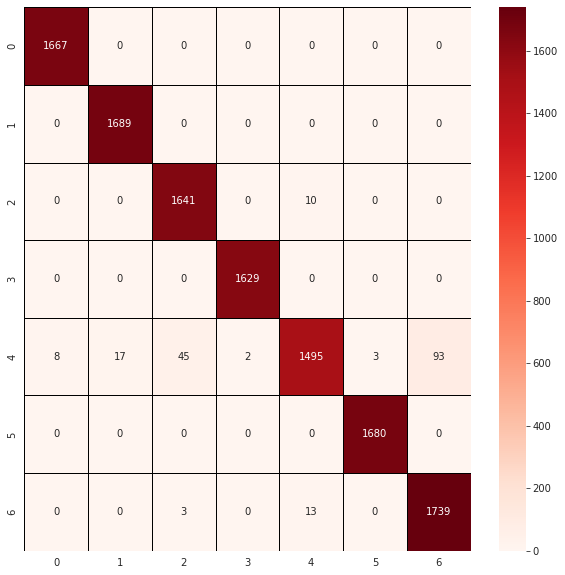

In [28]:
cm = confusion_matrix(y_test.argmax(axis = 1) , y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = [i for i in range(7)] , columns = [i for i in range(7)])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

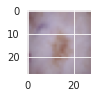

[0. 0. 1. 0. 0. 0. 0.]
('bkl', 'benign keratosis-like lesions')


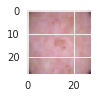

[0. 0. 1. 0. 0. 0. 0.]
('bkl', 'benign keratosis-like lesions')


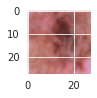

[0. 0. 0. 0. 1. 0. 0.]
('nv', ' melanocytic nevi')


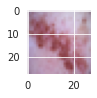

[0. 0. 1. 0. 0. 0. 0.]
('bkl', 'benign keratosis-like lesions')


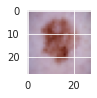

[0. 0. 0. 0. 0. 0. 1.]
('mel', 'melanoma')


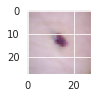

[0. 0. 0. 0. 0. 1. 0.]
('vasc', 'vascular lesions')


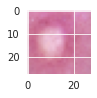

[0. 0. 0. 1. 0. 0. 0.]
('df', 'dermatofibroma')


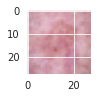

[1. 0. 0. 0. 0. 0. 0.]
('akiec', 'Actinic keratoses and intraepithelial carcinomae')


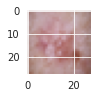

[0. 0. 0. 1. 0. 0. 0.]
('df', 'dermatofibroma')


In [29]:
import numpy as np

for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X_test[10+ i])
  plt.show()  
  print(np.round(y_pred[i + 10]))
  print(classes[np.argmax(y_pred[i + 10])])

Cho mô hình dự đoán 10 trường hợp bệnh về da và thu được kết quả chính xác